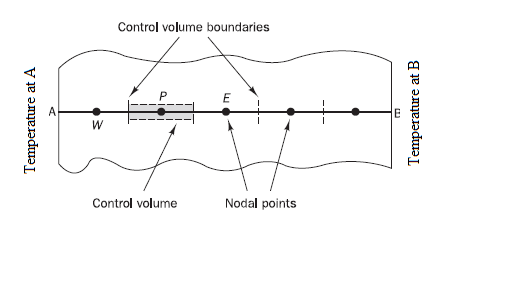

Discretização da equação acima usando volumes finitos resultará em uma equação geral da forma:

\begin{equation}
    a_P T_P = a_W T_W + a_E T_E + S_U
\end{equation}

Onde caso os pontos não sejam de contorno, os coeficientes serão dados por:

$a_W = \frac{\Gamma_w}{\delta x_{WP}}A_w$

$a_E = \frac{\Gamma_e}{\delta x_{PE}}A_e$

$a_P = a_W + a_E - S_p$

**Problema 4.1)** Resolva a equação de difusão de estado estacionário dada por:

\begin{equation}
    \frac{d}{dx} \left(  \kappa \frac{dT}{dx} \right) = 0
\end{equation}

Em um barra de comprimento $\Delta x = 0.5$, condições de contorno $T(0) = 100$, $T(0.5) = 500$, e com coeficiente de difusão $\kappa = 1000$ e área transversal $10 \times 10^{-3}$. 

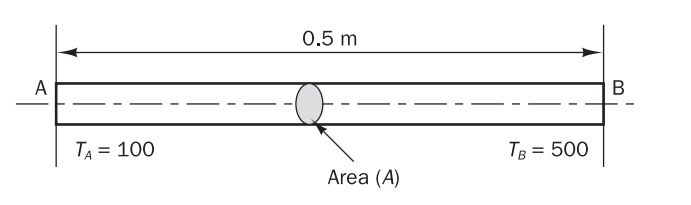

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kappa = 1000 # Coeficiente de difusão
S = 10e-3 # Área da seção transversal
N = 10 # Número de pontos da discretização
L = 0.5 # Comprimento da barra metálica
Ta = 100 # Temperatura em x = 0
Tb = 500 # Temperatura em x = L

h = np.float64(L / (N)) # Tamanho do intervalo discretizado

In [3]:
# de forma geral cada equação linear do sistema representa: ap*Ti - aw*T{i-1} - ae*T{i+1} = 0
def coeff_A(i):
    if i == 0 :
        # condição de contorno Ta
        aW = 0
        aE = (kappa*S)/h
        Sp = (-2*kappa*S)/h
        aP = aW + aE - Sp
        Su = (2*kappa*S*Ta)/h
    elif i == N-1:
        # condição de contorno Tb
        aW = (kappa*S)/h
        aE = 0
        Sp = (-2*kappa*S)/h
        aP = aW + aE - Sp
        Su = (2*kappa*S*Tb)/h
    else:
        aW = (kappa*S)/h
        aE = (kappa*S)/h
        aP = aW + aE
        Sp = 0
        Su = 0
    return aW, aE, aP, Su

# Constroi a matriz A e b para resolver o sistema: Au=b.
def build_A_and_b():
    A = np.zeros((N,N))
    b = np.zeros((N,1))

    # Calcula antecipadamente condições de contorno...
    aW, aE, aP, Su = coeff_A(0)
    A[0,0] = aP
    A[0,1] = -aE 
    b[0] = Su

    aW, aE, aP, Su = coeff_A(N-1)
    A[N-1,N-1] = aP
    A[N-1,N-2] = -aW 
    b[N-1] = Su

    # ordem Ap, Ae, Aw
    for i in range(1,N-1):
        aW, aE, aP, Su = coeff_A(i) # encontra os coeficientes para preencher a matriz
        A[i,i] = aP
        A[i,i+1] = -aE 
        A[i,i-1] = -aW
        b[i] = Su

    return A, b

In [4]:
A, b = build_A_and_b()
u_middle = np.linalg.solve(A, b)
u = np.zeros(N+2)
u[1:-1] = u_middle[:, 0]
u[0] = Ta
u[-1] = Tb

In [5]:
print(A)

[[ 600. -200.    0.    0.    0.    0.    0.    0.    0.    0.]
 [-200.  400. -200.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -200.  400. -200.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -200.  400. -200.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -200.  400. -200.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -200.  400. -200.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -200.  400. -200.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -200.  400. -200.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -200.  400. -200.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -200.  600.]]


In [6]:
# Plotando os resultados...
middle_points = np.arange(h/2, h/2 + (N)*h, h)
x = np.zeros(N+2)
x[1:-1] = middle_points
x[0] = 0.0
x[-1] = L

# calculo do erro
error = np.linalg.norm(u - (800*x+100), np.inf)

plt.plot(x, u, marker='o', label='Solução usando Volumes Finitos')
plt.plot(x, 800*x + 100, marker='^', label='Solução Exata')
plt.xlim(0, 0.5)
plt.ylim(0, 600)
plt.legend()
plt.title(r"$| u_{exact} - u_{approx} | = $" + f"{error:.2e}")
plt.show()

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>